In [4]:
import pandas as pd

# Load the datasets
features_df = pd.read_csv('elliptic_txs_features.csv', header=None)
classes_df = pd.read_csv('elliptic_txs_classes.csv')
edgelist_df = pd.read_csv('elliptic_txs_edgelist.csv')

# Display the first few rows of each dataset
print("Features DataFrame")
print(features_df.head())
print("\nClasses DataFrame")
print(classes_df.head())
print("\nEdgelist DataFrame")
print(edgelist_df.head())


Features DataFrame
         0    1         2         3         4          5         6    \
0  230425980    1 -0.171469 -0.184668 -1.201369  -0.121970 -0.043875   
1    5530458    1 -0.171484 -0.184668 -1.201369  -0.121970 -0.043875   
2  232022460    1 -0.172107 -0.184668 -1.201369  -0.121970 -0.043875   
3  232438397    1  0.163054  1.963790 -0.646376  12.409294 -0.063725   
4  230460314    1  1.011523 -0.081127 -1.201369   1.153668  0.333276   

        7          8         9    ...       157       158       159       160  \
0 -0.113002  -0.061584 -0.162097  ... -0.562153 -0.600999  1.461330  1.461369   
1 -0.113002  -0.061584 -0.162112  ...  0.947382  0.673103 -0.979074 -0.978556   
2 -0.113002  -0.061584 -0.162749  ...  0.670883  0.439728 -0.979074 -0.978556   
3  9.782742  12.414558 -0.163645  ... -0.577099 -0.613614  0.241128  0.241406   
4  1.312656  -0.061584 -0.163523  ... -0.511871 -0.400422  0.517257  0.579382   

        161       162       163       164       165       166

In [7]:
# Rename columns for the features DataFrame
features_df.rename(columns={0: 'txId'}, inplace=True)
feature_columns = ['feature_' + str(i) for i in range(1, 167)]
features_df.columns = ['txId'] + feature_columns

# Merge features and classes on txId
df_merged = pd.merge(features_df, classes_df, on='txId', how='left')

# Remove rows with unknown class
df_filtered = df_merged[df_merged['class'] != 'unknown']

# Display merged DataFrame
print(df_filtered.head())


         txId  feature_1  feature_2  feature_3  feature_4  feature_5  \
3   232438397          1   0.163054   1.963790  -0.646376  12.409294   
9   232029206          1  -0.005027   0.578941  -0.091383   4.380281   
10  232344069          1  -0.147852  -0.184668  -1.201369  -0.121970   
11   27553029          1  -0.151357  -0.184668  -1.201369  -0.121970   
16    3881097          1  -0.172306  -0.184668  -1.201369   0.028105   

    feature_6  feature_7  feature_8  feature_9  ...  feature_158  feature_159  \
3   -0.063725   9.782742  12.414558  -0.163645  ...    -0.613614     0.241128   
9   -0.063725   4.667146   0.851305  -0.163645  ...    -0.613614     0.241128   
10  -0.043875  -0.113002  -0.061584  -0.137933  ...    -0.613614     0.241128   
11  -0.043875  -0.113002  -0.061584  -0.141519  ...    -0.582077    -0.979074   
16  -0.043875  -0.029140   0.242712  -0.163640  ...    -0.600999     0.241128   

    feature_160  feature_161  feature_162  feature_163  feature_164  \
3      0.

C:\Users\ayush\AppData\Local\Temp\ipykernel_65492\4079254144.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=df_filtered, palette="coolwarm")


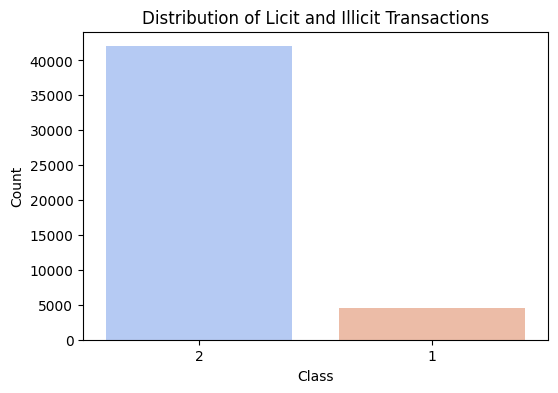

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='class', data=df_filtered, palette="coolwarm")
plt.title('Distribution of Licit and Illicit Transactions')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


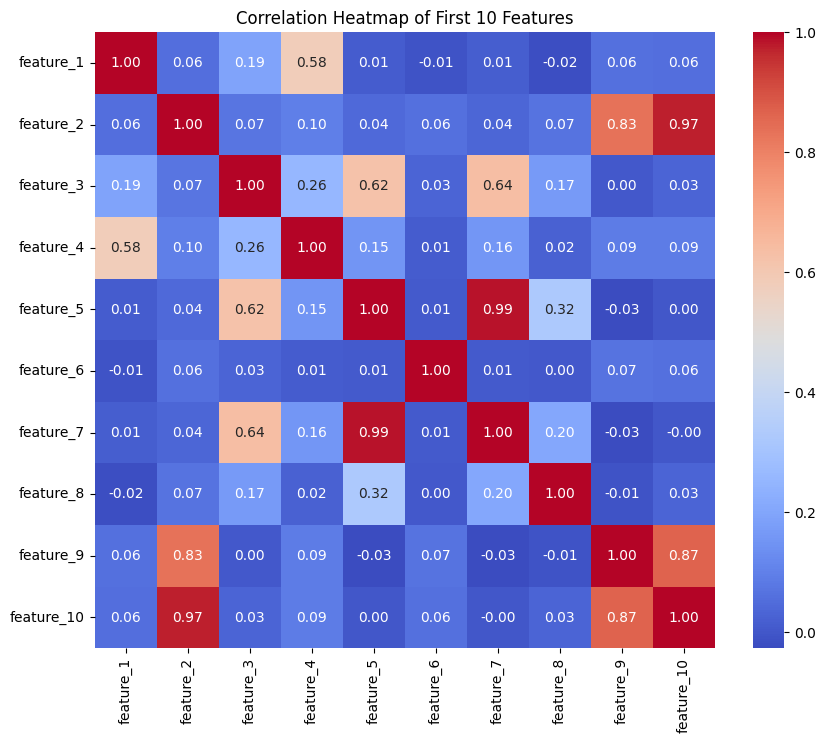

In [9]:
# Subset of the first 10 features
subset_features = df_filtered.iloc[:, 1:11]

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(subset_features.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of First 10 Features')
plt.show()


C:\Users\ayush\AppData\Local\Temp\ipykernel_65492\3694792875.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['time_step'] = df_filtered['feature_1']
C:\Users\ayush\AppData\Local\Temp\ipykernel_65492\3694792875.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='time_step', data=df_filtered, palette="coolwarm")


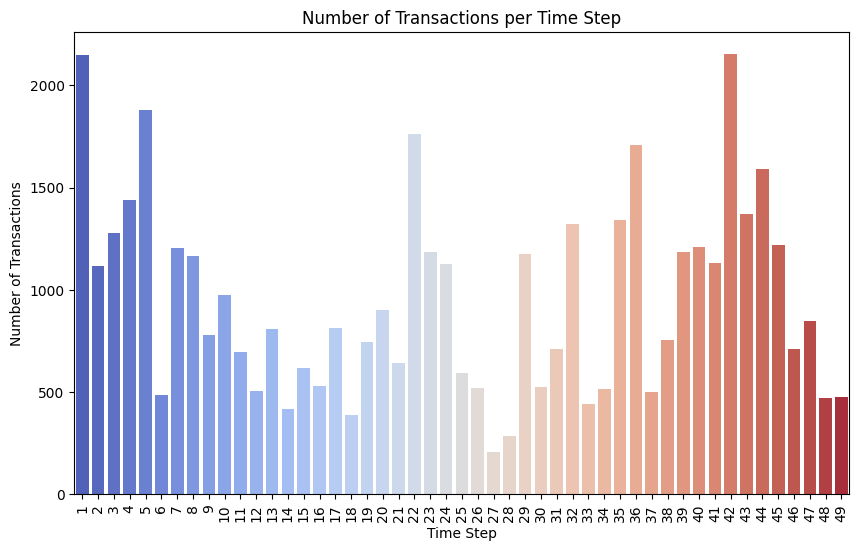

In [10]:
# Extract time step information (assuming it's the first feature)
df_filtered['time_step'] = df_filtered['feature_1']

# Plot the number of transactions over time steps
plt.figure(figsize=(10, 6))
sns.countplot(x='time_step', data=df_filtered, palette="coolwarm")
plt.title('Number of Transactions per Time Step')
plt.xlabel('Time Step')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=90)
plt.show()


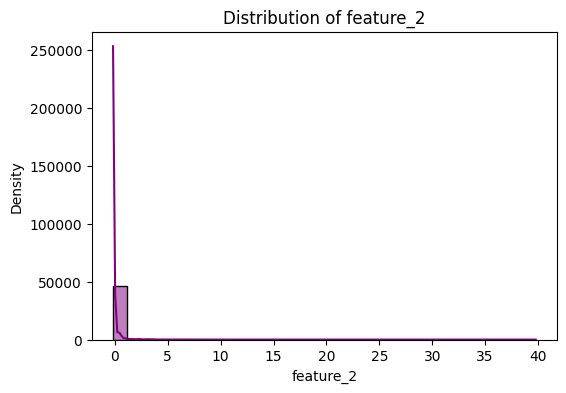

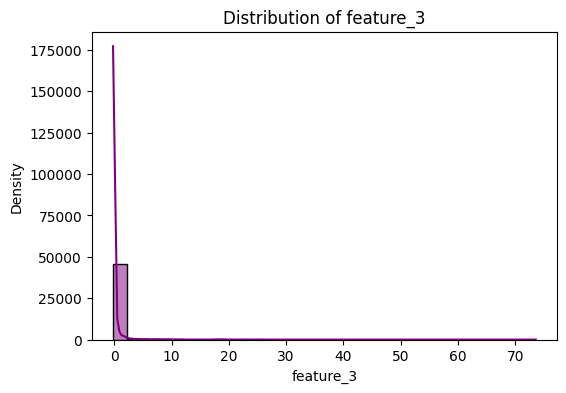

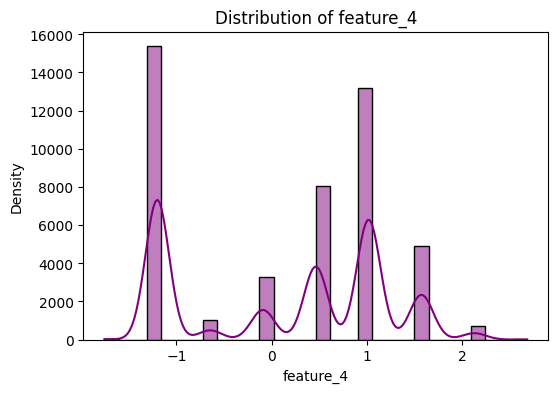

In [11]:
# Select some features to plot their distribution
selected_features = ['feature_2', 'feature_3', 'feature_4']

for feature in selected_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_filtered[feature], kde=True, bins=30, color='purple')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.show()


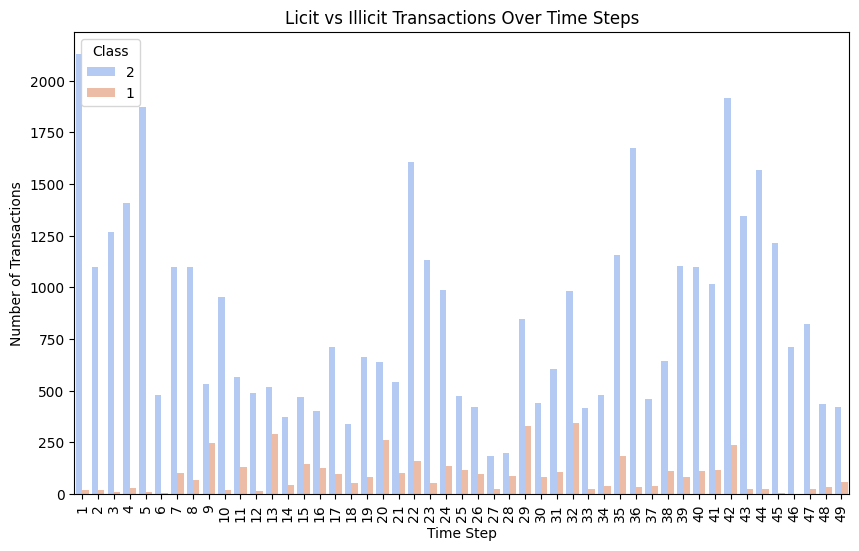

In [12]:
# Plot illicit vs licit transactions over time steps
plt.figure(figsize=(10, 6))
sns.countplot(x='time_step', hue='class', data=df_filtered, palette="coolwarm")
plt.title('Licit vs Illicit Transactions Over Time Steps')
plt.xlabel('Time Step')
plt.ylabel('Number of Transactions')
plt.legend(title='Class', loc='upper left')
plt.xticks(rotation=90)
plt.show()
